# Homework 3 
## Assignment 3

### Idea
The bike durations of people under 60 are longer than the durations of people over 60.
### Null Hypothesis
The bike durations of people under 60 are longer than or equal to the durations of people over 60.
### Alternative Hypothesis
The bike durations of people under 60 are shorter than the durations of people over 60.
### Significance Level:
α=0.05

In [14]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

df = pd.read_csv('/Users/QCathy/Downloads/201502-citibike-tripdata.csv')
print df.columns

Populating the interactive namespace from numpy and matplotlib
Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [15]:
# When a person travel over 2700 seconds, he or she may be punished. So we eliminate the data that with the tripduration of 2700 seconds.
# I defind 'tridU' as the tripduration of people under 60 and 'tridO' as the tripduration of people over 60.
df['tridU'] = df['tripduration'][(2015-df['birth year'] < 60)&(df['usertype'] == 'Subscriber')&(df['tripduration'] <= 2700)]
df['tridO'] = df['tripduration'][(2015-df['birth year'] >= 60)&(df['usertype'] == 'Subscriber')&(df['tripduration'] <= 2700)]

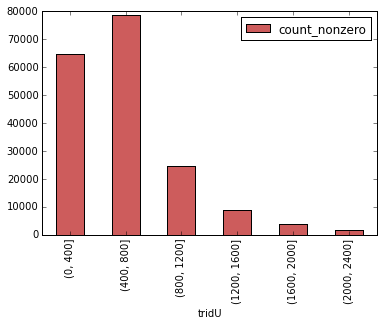

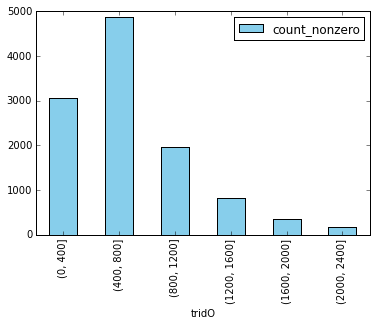

In [16]:
bins = np.arange(0,2700,400)
df.tridU.groupby(pd.cut(df.tridU, bins)).agg([count_nonzero]).plot(kind='bar', color = 'IndianRed')
df.tridO.groupby(pd.cut(df.tridO, bins)).agg([count_nonzero]).plot(kind='bar', color = 'Skyblue')

In [17]:
tridU_mean = mean(df['tridU'])
print tridU_mean

599.572713117


In [18]:
tridO_mean = mean(df['tridO'])
print tridO_mean

698.35729443


### In this problem we will apply Welch's t-test, which is used when the two population variances are not assumed to be equal and hence must be estimated separately. The t-statistic $$t = {\; \overline{X}_1 - \overline{X}_2 \; \over \sqrt{ \; {s_1^2 \over N_1} \; + \; {s_2^2 \over N_2} \quad }}$$

In [19]:
# calculate mean and variance

tridO_count = np.count_nonzero(np.isnan(df['tridO']))
tridU_count = np.count_nonzero(np.isnan(df['tridU']))
tridO_mean = mean(df['tridO'])
tridU_mean = mean(df['tridU'])
tridO_var = var(df['tridO'])
tridU_var = var(df['tridU'])
print tridO_count

185620


In [20]:
# calculate t-statistic
t = ( tridO_mean - tridU_mean ) / np.sqrt( tridO_var / tridO_count + tridU_var / tridU_count )
print t

29.2838826472


### Since t>1.65 (this is an one-side test), we can reject the null hypothesis.